In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

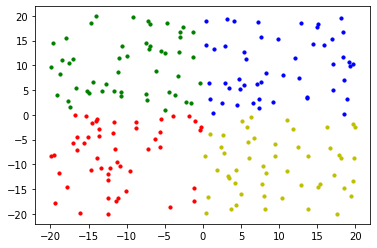

In [149]:
# Prevent divide by 0 errors
np.seterr(divide='ignore', invalid='ignore')
# Generate 4 groups of random 2d data
bgroup = 20 * np.random.rand(200, 2)
rgroup = -20 * np.random.rand(50, 2)
ggroup = 20 * np.random.rand(50, 2) - 50 * [[20, 0]]
ygroup = 20 * np.random.rand(50, 2) - 50 * [[0, 20]]
# Replace the quadrants of bgroup with the other groups
bgroup[50:100, :] = rgroup
bgroup[100:150, :] = ggroup
bgroup[150:200, :] = ygroup
plt.scatter(bgroup[0:50, 0], bgroup[0:50, 1], s = 10, c = 'b')
plt.scatter(bgroup[50:100, 0], bgroup[50:100, 1], s = 10, c = 'r')
plt.scatter(bgroup[100:150, 0], bgroup[100:150, 1], s = 10, c = 'g')
plt.scatter(bgroup[150:200, 0], bgroup[150:200, 1], s = 10, c = 'y')
plt.show()

In [150]:
Kmean = KMeans(n_clusters = 4)
Kmean.fit(bgroup)
Kmean.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 0 2 2 2 2 2 2 1 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 1 2 2 2 2 0 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


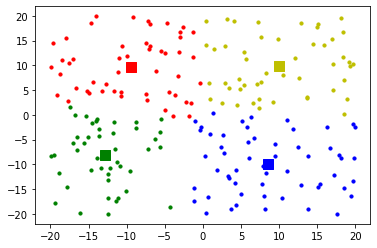

In [151]:
print(Kmean.labels_)
labels = Kmean.labels_
centroids = Kmean.cluster_centers_

for i in range(200):
    if labels[i] == 0:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'b')
    if labels[i] == 1:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'r')
    if labels[i] == 2:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'g')
    if labels[i] == 3:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'y')

plt.scatter(centroids[0][0], centroids[0][1], s = 100, c = 'b', marker='s')
plt.scatter(centroids[1][0], centroids[1][1], s = 100, c = 'r', marker='s')
plt.scatter(centroids[2][0], centroids[2][1], s = 100, c = 'g', marker='s')
plt.scatter(centroids[3][0], centroids[3][1], s = 100, c = 'y', marker='s')

plt.show()

In [162]:
# Our KMeans class
class KMemes:
    # Constructor
    def __init__(self, n_clusters, n_init):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.labels_ = []
        self.centroids = []
        self.fitted = False

    # array has 2 axes- (number of points, dimensions per point)
    def fit(self, array):
        # Get number of dimensions for each point
        self.point_dimensions = np.shape(array)[1]
        # resize centroids
        self.centroids = np.zeros(shape=(self.n_clusters, self.point_dimensions))
        # labels has an int representing a centroids index for each point
        self.labels_ = np.zeros(shape=(np.shape(array)[0]), dtype = int)
        # Used to compare different runs against each other
        self.best_distance = sys.maxsize # infinity
        # Number of iterations on best run
        self.best_iterations = 0

        # This loop tries out n_init different fits
        for i in range(self.n_init):
            # Used to measure how many iterations were run
            iterations = 0
            # Randomly select centroids (don't directly change self.centroids yet)
            new_centroids = np.random.rand(self.n_clusters, self.point_dimensions)
            new_labels = np.zeros(shape=(np.shape(array)[0]), dtype = int)
            prev_distance = sys.maxsize

            # This loop improves the fits
            while True:
                iterations += 1
                # Get the closest centroid for each data point
                # We don't want to edit new_centroids just yet
                _new_centroids = new_centroids
                _array = array
                numcentroids = len(_new_centroids)
                numpoints = len(_array)
                # vector dark magic- tiling (repeating) arrays to get pair differences
                _new_centroids = np.repeat([_new_centroids], numpoints, axis = 0)
                _new_centroids = _new_centroids.reshape(_new_centroids.size).reshape((numpoints * numcentroids), self.point_dimensions)
                _array = np.repeat([_array], numcentroids, axis = 1)
                # finding Euclidean distances in vectorizalied way
                square_distances = (_new_centroids - _array)**2
                square_distances = square_distances.sum(axis = 2).reshape(numpoints, numcentroids)
                # new_labels gets the indicies of the closest centroids for each point
                new_labels = np.argmin(square_distances, axis = 1)
                # sum of distances in this iteration (we want to decrease this)
                current_distance = square_distances[np.linspace(0, len(square_distances)-1, len(square_distances),dtype=int), new_labels].sum()

                # Update centroids with means of each cluster:
                # Sum of coordinates of all points in each cluster
                cluster_coordinate_sums = np.zeros((self.n_clusters, self.point_dimensions), dtype=float)
                # Number of points in each cluster
                cluster_numberof_points = np.zeros(self.n_clusters)
                # Check which centroid for every point and get the mean locations of each cluster
                np.add.at(cluster_coordinate_sums, new_labels, array)
                np.add.at(cluster_numberof_points, new_labels, 1)

                cluster_numberof_points = cluster_numberof_points.reshape(np.shape(cluster_numberof_points)[0], 1)
                new_centroids = cluster_coordinate_sums / cluster_numberof_points
                # Stop iterating once the distance has stopped decreasing
                if np.abs(prev_distance - current_distance) < 10 or iterations > 100:
                    self.fitted = True
                    if current_distance < self.best_distance:
                        self.best_distance = current_distance
                        self.best_iterations = iterations
                        # Update the actual centroids and labels
                        self.centroids = new_centroids
                        self.labels_ = new_labels
                    break
                prev_distance = current_distance

    def debugprint(self):
        if self.fitted == False:
            print("Not fitted")
            return
        print("centroids: " + str(self.centroids))
        print("labels: " + str(self.labels_))   
        print("iterations: " + str(self.best_iterations))
        print("distance sum: " + str(self.best_distance))


centroids: [[-12.88641881  -8.14377428]
 [  9.96035717   9.89495358]
 [ -9.39479891   9.72839691]
 [  8.59166422  -9.85163557]]
labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 3 0 0 0 0 0 0 2 3 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 3 0 3 0 0 0 0 0 0 0 0 0 2 0 0 0 0 3 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
iterations: 8
distance sum: 13711.734693859758


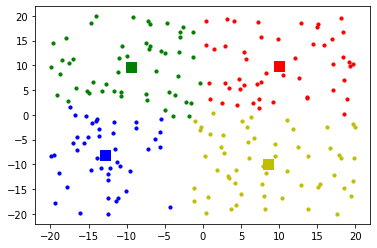

In [153]:
myKmeans = KMemes(n_clusters = 4, n_init = 50)
myKmeans.fit(bgroup)
myKmeans.debugprint()

myLabels = myKmeans.labels_
myCentroids = myKmeans.centroids

for i in range(200):
    if myLabels[i] == 0:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'b')
    if myLabels[i] == 1:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'r')
    if myLabels[i] == 2:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'g')
    if myLabels[i] == 3:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'y')

plt.scatter(myCentroids[0][0], myCentroids[0][1], s = 100, c = 'b', marker='s')
plt.scatter(myCentroids[1][0], myCentroids[1][1], s = 100, c = 'r', marker='s')
plt.scatter(myCentroids[2][0], myCentroids[2][1], s = 100, c = 'g', marker='s')
plt.scatter(myCentroids[3][0], myCentroids[3][1], s = 100, c = 'y', marker='s')

plt.show()

In [154]:
# Import the spotify data
data_raw = pd.read_csv('data_by_artist_o.csv')

In [155]:
# Drop useless columns
data = data_raw.drop(columns = ['genres', 'artists', 'duration_ms', 'count', 'key'])
data = data.dropna()

In [156]:
# Fit scikit model to data
scikitFit = KMeans()
scikitFit.fit(data)
scikitFit.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [157]:
# Fit our model to data
ourFit = KMemes(n_clusters = 8, n_init = 5)
ourFit.fit(data)

In [161]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
print(scikitFit.cluster_centers_)
ourFit.centroids

[[0.441610 0.566509 0.513700 0.150558 0.192818 -11.693124 0.070244
  114.897914 0.568261 35.021651 0.806060]
 [0.852531 0.496325 0.314051 0.257756 0.227410 -13.989904 0.102192
  108.785321 0.498282 4.127493 0.839786]
 [0.329462 0.488839 0.630359 0.121796 0.193620 -8.865201 0.117927
  172.573972 0.571470 44.005022 0.721106]
 [0.473637 0.523581 0.464410 0.209293 0.193996 -12.544329 0.105719
  85.594608 0.442319 47.303537 0.697600]
 [0.908062 0.421191 0.260068 0.285614 0.232157 -14.826368 0.115028
  82.462883 0.415179 4.145224 0.800165]
 [0.280938 0.646393 0.622196 0.075009 0.186456 -7.899109 0.093900
  113.571999 0.513980 58.756949 0.700502]
 [0.283408 0.575756 0.633548 0.095648 0.192908 -8.519769 0.085973
  136.818127 0.532578 49.497705 0.742540]
 [0.635936 0.548311 0.458955 0.304269 0.223550 -11.840700 0.095646
  138.138289 0.544073 4.562871 0.749033]]


array([[0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
        0.000000, 0.000000, 0.000000, 0.000000, 0.000000],
       [0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
        0.000000, 0.000000, 0.000000, 0.000000, 0.000000],
       [0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
        0.000000, 0.000000, 0.000000, 0.000000, 0.000000],
       [0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
        0.000000, 0.000000, 0.000000, 0.000000, 0.000000],
       [0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
        0.000000, 0.000000, 0.000000, 0.000000, 0.000000],
       [0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
        0.000000, 0.000000, 0.000000, 0.000000, 0.000000],
       [0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
        0.000000, 0.000000, 0.000000, 0.000000, 0.000000],
       [0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
        0.000000, 0.000000, 0.000000, 0.000

In [27]:
# create a new column giving the scikit label of each artist
data['scikitLabel'] = scikitFit.labels_
centroids = scikitFit.cluster_centers_
data
# for i in range(200):
#     if labels[i] == 0:
#         plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'b')
#     if labels[i] == 1:
#         plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'r')
#     if labels[i] == 2:
#         plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'g')
#     if labels[i] == 3:
#         plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'y')

# plt.scatter(centroids[0][0], centroids[0][1], s = 100, c = 'b', marker='s')
# plt.scatter(centroids[1][0], centroids[1][1], s = 100, c = 'r', marker='s')
# plt.scatter(centroids[2][0], centroids[2][1], s = 100, c = 'g', marker='s')
# plt.scatter(centroids[3][0], centroids[3][1], s = 100, c = 'y', marker='s')

# plt.show()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,mode,scikitLabel
0,0.590111,0.467222,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,1,5
1,0.862538,0.441731,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,1,5
2,0.856571,0.348286,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,1,2
3,0.884926,0.425074,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,1,2
4,0.510714,0.467143,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
28675,0.512000,0.356000,0.306000,0.008970,0.108000,-10.119000,0.027700,150.049000,0.328000,35.000000,1,6
28676,0.541000,0.578000,0.334000,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,48.000000,0,6
28677,0.785455,0.570818,0.148400,0.000083,0.142191,-21.610091,0.054355,119.586273,0.741273,23.000000,1,5
28678,0.381000,0.353000,0.686000,0.000000,0.056800,-9.103000,0.039500,200.341000,0.352000,35.000000,1,3
